## The Data

<img src="mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Goal

**THIS IS IMPORTANT, THIS IS NOT OUR TYPICAL PREDICTIVE MODEL!**

Our general goal here is to see if we can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features people should look out for when picking mushrooms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# EDA

<Axes: xlabel='class', ylabel='count'>

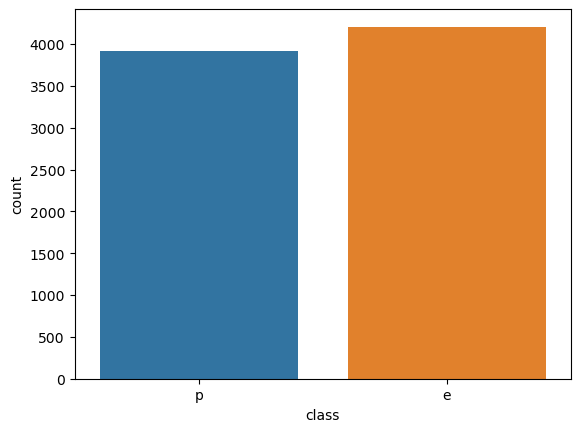

In [4]:
sns.countplot(data=df,x='class');

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

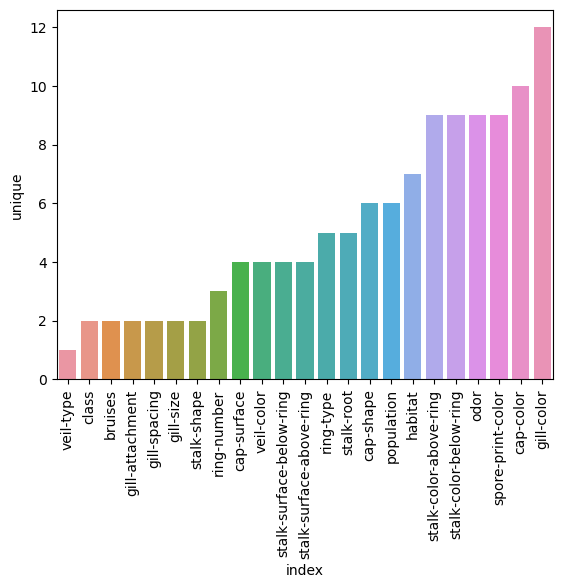

In [8]:
sns.barplot(data=feat_uni, x='index',y='unique')
plt.xticks(rotation=90);

# Train Test Split

In [9]:
X = df.drop('class', axis=1)
y = df['class']

In [10]:
X = pd.get_dummies(X)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=101)

# Modeling

In [13]:
from sklearn.ensemble import AdaBoostClassifier

In [14]:
model = AdaBoostClassifier(n_estimators=1)

In [15]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [17]:
preds = model.predict(X_test)

## Evaluation

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [18]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [19]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
X.columns[model.feature_importances_.argmax()]

'odor_n'

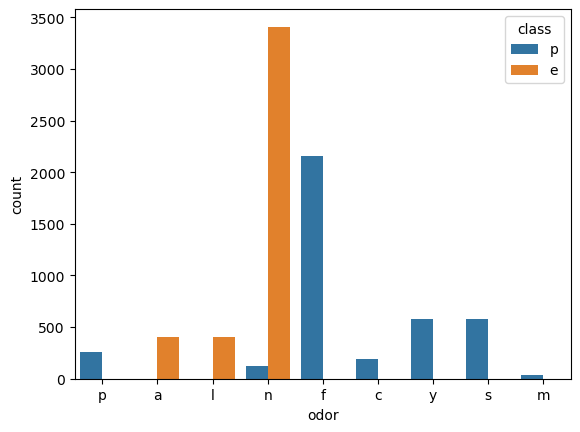

In [24]:
sns.countplot(df, x='odor',hue='class');

## Analyzing performance as more weak learners are added.

In [25]:
len(X.columns)

117

In [26]:
error_rates = []

for n in range(1,118):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, preds)
    
    error_rates.append(err)

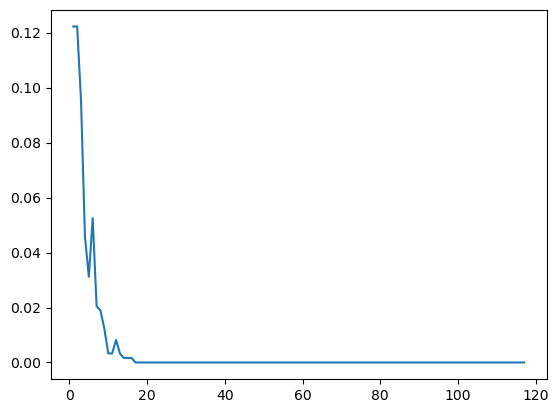

In [27]:
plt.plot(range(1,118),error_rates);

In [30]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [33]:
imp_feats = feats[feats['Importance'] > 0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'cap-surface_f'),
  Text(1, 0, 'cap-color_c'),
  Text(2, 0, 'cap-color_n'),
  Text(3, 0, 'cap-color_w'),
  Text(4, 0, 'bruises_f'),
  Text(5, 0, 'bruises_t'),
  Text(6, 0, 'odor_c'),
  Text(7, 0, 'odor_f'),
  Text(8, 0, 'odor_n'),
  Text(9, 0, 'odor_p'),
  Text(10, 0, 'gill-spacing_c'),
  Text(11, 0, 'gill-spacing_w'),
  Text(12, 0, 'gill-size_b'),
  Text(13, 0, 'gill-size_n'),
  Text(14, 0, 'gill-color_b'),
  Text(15, 0, 'gill-color_w'),
  Text(16, 0, 'stalk-shape_e'),
  Text(17, 0, 'stalk-shape_t'),
  Text(18, 0, 'stalk-root_r'),
  Text(19, 0, 'stalk-surface-above-ring_k'),
  Text(20, 0, 'stalk-surface-below-ring_f'),
  Text(21, 0, 'stalk-surface-below-ring_s'),
  Text(22, 0, 'stalk-surface-below-ring_y'),
  Text(23, 0, 'stalk-color-below-ring_n'),
  Text(24, 0, 'ring-number_t'),
  Text(25, 0, 'ring-type_p'),
  Text(26, 0, 'spo

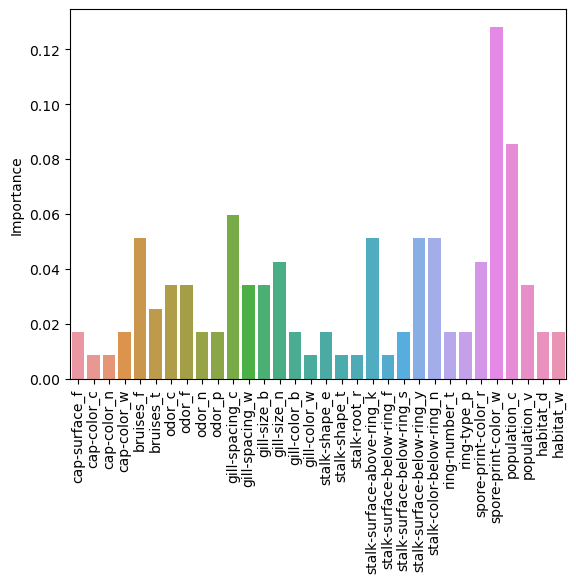

In [35]:
sns.barplot(data=imp_feats,x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);